In [1]:
import pandas as pd
import numpy as np

# Introducción

Contexto empresarial: la empresa se dedica a proporcionar servicios de television por cable (DirecTV). Estos servicios se pueden contratar un vez consumidos con la emision de una factura (pospago) o mediante la recarga de una tarjeta (prepago). El data set corresponde a la cantidad de servicios pospago que se vendieron (activaciones) desde 2014 a 2019. Este servicio se contrata por diferentes canales: televentas, formularios y por la web. El paso anterior a la activacion del servicio es el contacto por alguno de estos canales. Los principales competidores del servicio de pospago son CableVision, Netflix y Telecentro.

Problema empresarial: con el ingreso del nuevo Director de Marketing comenzo una auditoria para comprender las razones por las cuales las activaciones del servicio estan cayendo. Segun la corazonada del nuevo DDMM el avance de las plataformas de streaming y su rapida aceptacion del publico estan causando estragos en la categoria. En un futuro cercano, el cree que si los competidores continuan aumentando sus gastos en publicidad para seguir mejorando su imagen de marca las activaciones del servicio pospago caeran aun mas. ¿Cuanto sera el impacto en la activaciones si los competidores siguen apoderandose de la categoria? ¿Como puede la empresa contrarestar el aumento de gastos en medios de la competencia? ¿Cuanto sera el impacto de la mejora en la imagen de marca de la competencia?

Contexto analítico: a partir de la data proporcionada por el departamento de Marketing comprobaremos si la corazonada del DDMM es correcta o si la caida en las activaciones corresponde a otras razones que ellos si puedan controlar (precios, imagen de marca propia, gastos en publicidad, etc).Para esto realizaremos escenarios con diferentes niveles de gasto de publicidad de la competencia y predeciremos los niveles de venta alcanzado para el servicio pospago. Lo mismo haremos para los diferentes niveles que pueda llegar a alcanzar la imagen de marca la competencia.

El caso está estructurado de la siguiente manera: (1) realizaremos un análisis de datos exploratorio para investigar visualmente las relacion entre las activaciones y las posibles causas de su variacion; (2) utilizar los conocimientos observados para ajustar formalmente los modelos de regresión; y finalmente (3) responderemos a la inquitud del DDMM y propondremos una solucion a su problema.

In [2]:
df=pd.read_excel('MF_DTV_ACT_POS_FINAL_6_v2.xlsx')
df.head()

,DATE,ACTIVACIONES_POS,CONTACTOS_TLV,CONTACTOS_WEB,CONTACTOS_IMP,BB_CATEGORIA,DTV_RECORDACION,DTV_PROGRAMACION,DTV_TOH,DTV_DEPORTE,...,CBV_TOH,CBV_DEPORTE,CBV_GOOGLETRENDS,TEL_GOOGLETRENDS,NET_GOOGLETRENDS,ANT_GOOGLETRENDS,IMEDIOS_AOS,MEDIOS_PRE,MEDIO_POS,MEDIOS_DTV
0,2014-01-01,0,0,135.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.17,0.42,0.29,0.06,0.18,0.0,14907.49,5234.59,8034.35,17741.94
1,2014-01-02,1095,846,1977.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.17,0.42,0.29,0.06,0.18,0.0,14907.49,3143.85,8291.79,17741.94
2,2014-01-03,858,732,1486.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.17,0.42,0.29,0.06,0.18,0.0,14907.49,3076.11,6356.17,17741.94
3,2014-01-04,567,443,821.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.17,0.42,0.29,0.06,0.18,0.0,14907.49,3025.88,5621.20,17741.94
4,2014-01-05,13,156,430.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.17,0.42,0.29,0.06,0.18,0.0,14907.49,2991.54,5637.60,17741.94


In [3]:
#dimensiones dataset
df.shape

(2191, 50)

In [4]:
df.columns

Index(['DATE', 'ACTIVACIONES_POS', 'CONTACTOS_TLV', 'CONTACTOS_WEB',
       'CONTACTOS_IMP', 'BB_CATEGORIA', 'DTV_RECORDACION', 'DTV_PROGRAMACION',
       'DTV_TOH', 'DTV_DEPORTE', 'GA_SESIONES', 'DTV_GOOGLETRENDS',
       'MACRO_DESEMPLEO', 'MACRO_IPC', 'MACRO_USD', 'GT_DEPOR_LIBERTADORES',
       'GT_DEPOR_SUDAMERICANA', 'GT_DEPOR_COPA_AMERICA',
       'GT_DEPOR_SUPERLIGA_ARG', 'GT_DEPOR_COPA_ARGENTINA',
       'GT_DEPOR_CHAMPIONS_LEAGUE', 'GT_DEPOR_REAL_VS_BARZA',
       'GT_DEPOR_BOCA_VS_RIVER', 'GT_DEPOR_RACING_VS_INDEP',
       'GT_DEPOR_MUNDIAL_BASQUET', 'GT_DEPOR_MUNDIAL_RUGBY',
       'GT_DEPOR_MUNDIAL_FUTBOL', 'GT_DEPOR_JJOO', 'GT_DEPOR_US_OPEN',
       'GT_DEPOR_ROLAND_GARROS', 'GT_DEPOR_AUSTRALIA_OPEN',
       'GT_DEPOR_WIMBLEDON', 'GT_DEPOR_GRAND_SLAM', 'PRECIO_DIRECTV',
       'DTV__CTA', 'COMP_NETFLIX', 'COMP_TELECENTRO', 'COMP_CABLEVISION',
       'CBV_RECORDACION', 'CBV_PROGRAMACION', 'CBV_TOH', 'CBV_DEPORTE',
       'CBV_GOOGLETRENDS', 'TEL_GOOGLETRENDS', 'NET_GOOGLET

In [5]:
#creacion columna COMP_DTV que representa la suma de inversión en medios de DirectTV
df['COMP_DTV']=df['IMEDIOS_AOS']+df['MEDIOS_PRE']+df['MEDIO_POS']+df['MEDIOS_DTV']

## Gráficas e Interpretaciones Preliminares

* Visualización comparada de la inversión en medios que realiza DirectTv y sus compatidores
* Comparativa de inversión total en medios
* Comparativa de inversión en medios a través del tiempo

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

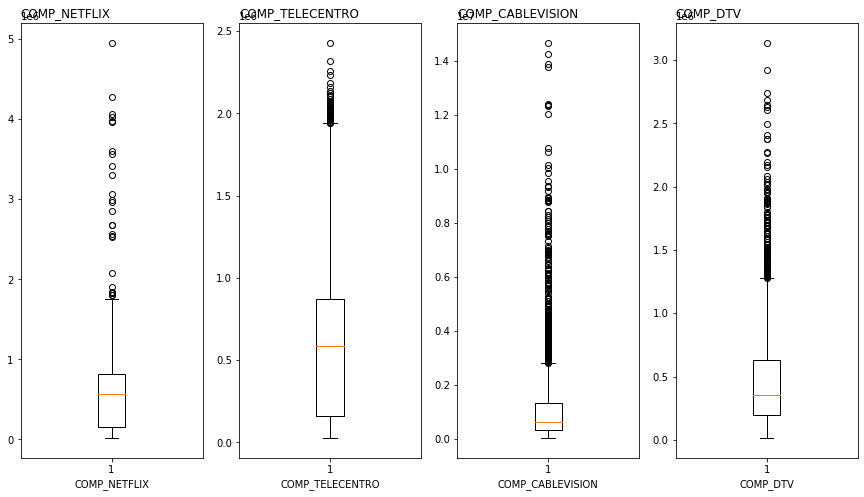

In [7]:
columnas=['COMP_NETFLIX', 'COMP_TELECENTRO', 'COMP_CABLEVISION','COMP_DTV']

plt.figure(figsize=(15,8))
i=1
for j in range(len(columnas)):
    plt.subplot(1,len(columnas),i, xlabel=columnas[j])
    plt.boxplot(df[columnas[j]])
    plt.title(columnas[j], loc='left')
    i +=1
plt.show()

In [8]:
df[columnas].describe()

,COMP_NETFLIX,COMP_TELECENTRO,COMP_CABLEVISION,COMP_DTV
count,2.191000e+03,2.191000e+03,2.191000e+03,2.191000e+03
mean,5.755780e+05,6.415099e+05,1.217329e+06,4.852214e+05
std,4.863021e+05,5.186098e+05,1.703354e+06,4.174922e+05
min,1.654880e+04,2.563913e+04,2.245658e+04,1.382711e+04
25%,1.555814e+05,1.608246e+05,3.068910e+05,1.930438e+05
50%,5.620640e+05,5.842777e+05,6.190269e+05,3.562817e+05
75%,8.157513e+05,8.736483e+05,1.311039e+06,6.271992e+05
max,4.955010e+06,2.429078e+06,1.466833e+07,3.136703e+06


### Interpretación preliminar del gráfico

* La inversión en medios es muy variada y esta gráfica debe complementarse con lo siguiente:
* Debe revisarse la inversión en medios en términos totales
* Debe revisarse la inversión en medios a través del tiempo 

In [9]:
inversiones=[]
for i in columnas:   
    suma=df[i].sum()
    inversiones.append(suma)
dfInversiones=pd.DataFrame({'Empresas':columnas, 'Inversiones':inversiones})
    

In [10]:
dfInversiones

,Empresas,Inversiones
0,COMP_NETFLIX,1.261091e+09
1,COMP_TELECENTRO,1.405548e+09
2,COMP_CABLEVISION,2.667168e+09
3,COMP_DTV,1.063120e+09


### Gráfica inversión total en medios 

<BarContainer object of 4 artists>

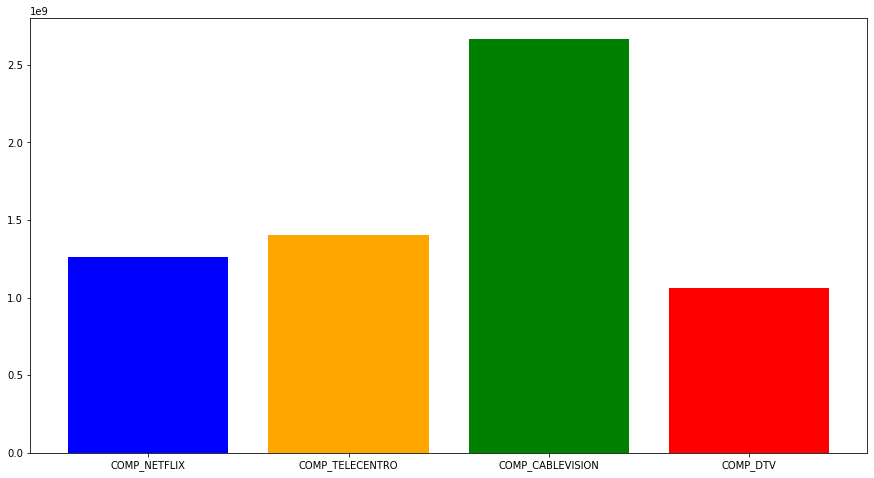

In [11]:
plt.rcParams['figure.figsize']=[15,8]
colores=['blue', 'orange', 'green','red']
plt.bar(dfInversiones['Empresas'], dfInversiones['Inversiones'], color=colores)

### Interpretación preliminar del gráfico

* DirectTv es la empresa que en términos totales absolutos ha realizado la menor inversión en medios
* Cablevisión es la empresa con mayor inversión en medios

In [12]:
index = pd.to_datetime(df["DATE"])
index = pd.DatetimeIndex(index)
df.index = index

In [13]:
df_inversionComp =df.groupby(pd.Grouper(freq='M'))[['COMP_NETFLIX','COMP_TELECENTRO','COMP_CABLEVISION','COMP_DTV', 'ACTIVACIONES_POS','PRECIO_DIRECTV']].sum()
df_inversionComp.head()

,COMP_NETFLIX,COMP_TELECENTRO,COMP_CABLEVISION,COMP_DTV,ACTIVACIONES_POS,PRECIO_DIRECTV
DATE,,,,,,
2014-01-31,4760408.01,3150038.87,6514083.50,6215693.30,26787,8990.0
2014-02-28,6137127.92,8555042.16,8463897.66,8022011.94,27123,8954.4
2014-03-31,1501941.19,4979665.17,14690507.23,7800908.46,24807,9913.8
2014-04-30,1497111.30,4040197.10,14190553.94,11978550.21,25713,9594.0
2014-05-31,1511601.19,3374455.93,8250908.22,13174870.30,33075,11501.0


In [14]:
x = df_inversionComp.index
y1 = df_inversionComp['COMP_NETFLIX']
y2 = df_inversionComp['COMP_TELECENTRO']
y3= df_inversionComp['COMP_CABLEVISION']
y4= df_inversionComp['COMP_DTV']

## Gráfica inversión en medios a través del tiempo

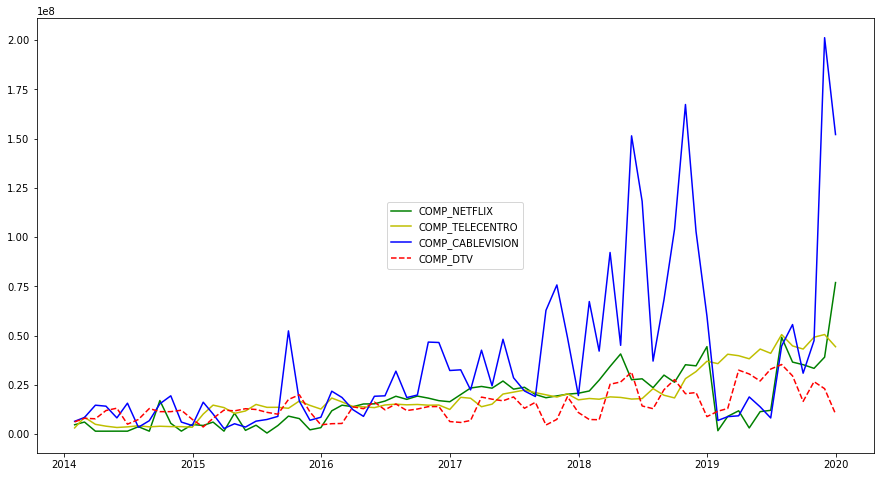

In [15]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(y1, 'g', label='COMP_NETFLIX')
plt.plot(y2, 'y', label='COMP_TELECENTRO')
plt.plot(y3, 'b', label='COMP_CABLEVISION')
plt.plot(y4, 'r--', label='COMP_DTV')
plt.legend(loc='center') #loc viene de location y se posiciona en la mejor posible 'best'

### Interpretación preliminar del gráfico

* DirectTv en último período es la empresa con menor inversión en medios
* La inversión en medios a través del tiempo ha sido variada, pero en largos períodos Cablevisión y Netflix han tenido mayor inversión que DirectTv

# Gráficas de Parcelas

## Objetivos

* Visualizar paralelamente las curvas de inverisión en medios, ventas y precio DirectTv
* Visualizar ventas versus el estado de salud de marca DirectTv

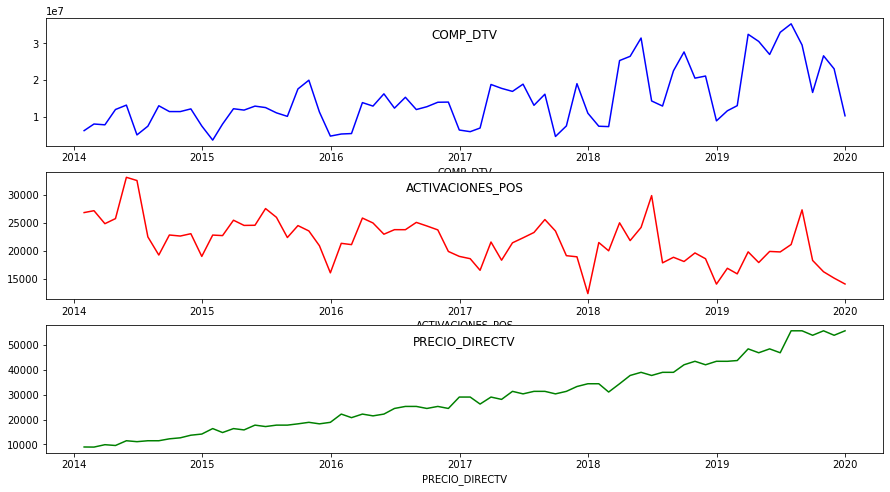

In [16]:
columnas=['COMP_DTV', 'ACTIVACIONES_POS','PRECIO_DIRECTV']
colores=['blue','red','green']

plt.figure(figsize=(15,8))
i=1
for j in range(len(columnas)):
    plt.subplot(len(columnas),1,i, xlabel=columnas[j])
    plt.plot(df_inversionComp[columnas[j]], color=colores[j])
    plt.title(columnas[j], y=0.8, loc='center')
    i +=1
plt.show()

### Interpretación preliminar del gráfico

* DirectTv ha tenido una inversión en medios en bajada el último período
* Las ventas han disminuído en el último período. Así mismo hacía atrás también se ve una tendencia a la baja desde mediados 2018.
* El precio ha ido en aumento

## Revisión de correlación entre variables

* Se visualizarán las correlaciones entre variables internas de DirectTv como con otras de los competidores

In [21]:
df_OtrasVariables =df.groupby(pd.Grouper(freq='M'))[['ACTIVACIONES_POS','PRECIO_DIRECTV','DTV_TOH','DTV_RECORDACION','COMP_NETFLIX','NET_GOOGLETRENDS','CBV_TOH','CBV_RECORDACION','COMP_TELECENTRO','COMP_CABLEVISION']].sum()
df_OtrasVariables.head()

,ACTIVACIONES_POS,PRECIO_DIRECTV,DTV_TOH,DTV_RECORDACION,COMP_NETFLIX,NET_GOOGLETRENDS,CBV_TOH,CBV_RECORDACION,COMP_TELECENTRO,COMP_CABLEVISION
DATE,,,,,,,,,,
2014-01-31,26787,8990.0,17.05,25.11,4760408.01,5.58,5.27,22.32,3150038.87,6514083.50
2014-02-28,27123,8954.4,15.40,22.68,6137127.92,5.60,4.76,20.16,8555042.16,8463897.66
2014-03-31,24807,9913.8,17.05,25.11,1501941.19,5.58,5.27,22.32,4979665.17,14690507.23
2014-04-30,25713,9594.0,16.20,24.30,1497111.30,5.10,5.10,21.30,4040197.10,14190553.94
2014-05-31,33075,11501.0,16.74,25.11,1511601.19,5.27,5.27,22.01,3374455.93,8250908.22


In [22]:
df_OtrasVariables.corr()

,ACTIVACIONES_POS,PRECIO_DIRECTV,DTV_TOH,DTV_RECORDACION,COMP_NETFLIX,NET_GOOGLETRENDS,CBV_TOH,CBV_RECORDACION,COMP_TELECENTRO,COMP_CABLEVISION
ACTIVACIONES_POS,1.000000,-0.534553,0.619501,0.240112,-0.391643,-0.431489,-0.345882,0.429224,-0.508657,-0.247444
PRECIO_DIRECTV,-0.534553,1.000000,-0.930478,-0.255073,0.728648,0.756578,0.754557,-0.578875,0.930581,0.556020
DTV_TOH,0.619501,-0.930478,1.000000,0.508440,-0.704897,-0.826454,-0.641471,0.716590,-0.832453,-0.553582
DTV_RECORDACION,0.240112,-0.255073,0.508440,1.000000,-0.321652,-0.672752,0.041777,0.704832,-0.081195,-0.264286
COMP_NETFLIX,-0.391643,0.728648,-0.704897,-0.321652,1.000000,0.637228,0.692588,-0.479790,0.599302,0.709549
NET_GOOGLETRENDS,-0.431489,0.756578,-0.826454,-0.672752,0.637228,1.000000,0.475315,-0.600926,0.568585,0.473162
CBV_TOH,-0.345882,0.754557,-0.641471,0.041777,0.692588,0.475315,1.000000,-0.259696,0.659654,0.575845
CBV_RECORDACION,0.429224,-0.578875,0.716590,0.704832,-0.479790,-0.600926,-0.259696,1.000000,-0.470963,-0.429731
COMP_TELECENTRO,-0.508657,0.930581,-0.832453,-0.081195,0.599302,0.568585,0.659654,-0.470963,1.000000,0.403240
COMP_CABLEVISION,-0.247444,0.556020,-0.553582,-0.264286,0.709549,0.473162,0.575845,-0.429731,0.403240,1.000000


### Interpretación preliminar correlación

* La publicidad de Netflix está inversamente correlacionada con la cantidad de activaciones porque el ínidice da -0.39.
* La publicidad de Telecentro está inversamente correlacionada con la cantidad de activaciones porque el ínidice da -0.5
* La publicidad de Cablevision está inversamente correlacionada con la cantidad de activaciones porque el ínidice da -0.24

De los 3 competidores la correlacion con la inversion en publicdad de Telecentro es la mas negativa. Podria aportar a priori explicacion sobre la caida de las activaciones posventa de DTV.

#### Para comprender que otras variables estan influyendo en la caida de las activaciones analizamos el precio del servicio

* El precio del propio servicio de DTV está inversamente correlacionado con la cantidad de activaciones porque el ínidice da -0.53. Esto podria indicar hay otras razones mas alla del avance de Netlfix y de la competencia que esten generado la caida en las ventas

#### Analizamos a continuacion dos variables de Salud de Marca de DTV: TOH (Top of Heart) y Recordacion.

Comencemos por TOH que significa la preferencia que tienen los consumidores por una marca, empresa o persona por el grado de cariño. Este concepto hace referencia a las emociones del consumidor hacia un producto en concreto. El TOH será un elemento clave para que el consumidor haga la compra del producto.

* La variable de salud de marca de DTV esta correlacionada positivamente con las activaciones pero su correlacion no es muy grande. A priori podria ser una variable que DTV podria controlar o mejorar para buscar aumentar sus activaciones.

Seguimos con la variable Recordacion o Top of Mind. Recordacion es la posición privilegiada que ocupa una marca en la mente del consumidor, es decir es la primera marca que recuerda de forma espontánea. Es muy importante destacar que aunque sea la primera marca que piense el consumir, no significa que vaya a adquirir el producto. La compra del producto dependerá de factores externos como el precio de la competencia, las características del producto, estacionalidad, categoria, etc.

* Esta segunda variable de salud de marca de DTV posee una correlacion menor que TOH como la teoria lo explicaba. A priori no seria una variable de control para solucionar el problema de la caia de las activaciones.


#### Analizamos ahora la Salud de Marca del competidores para poder comenzar a contestar la hipotesis del DD.MM

Como no contamos con info de TOH ni Recordacion para los competidores salvo Cablevision, usamos como proxy de Salud de Marca el indice de Google Trends. 

* Todas las corelaciones con las variables de salud de la competencia estan todas alineadas en la misma magnitud (en rango aprox -0,3 y -0,4 aprox), lo cual podria inidicar a priori que no hay ninguna en particular que este contribuyendo a la caida de las activaciones
* El signo de la ulitma correlacion de las activaciones con la recordacion de CBV no tiene mucho sentido de negocios. Pendiente de analizar en un modelo de regresion lineal para profundizar.


### Gráfica Ventas DirectTv versus salud de marca

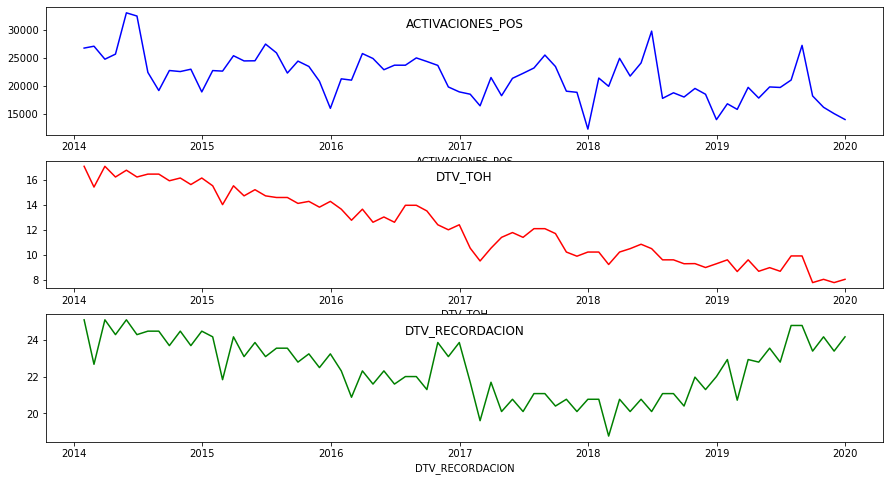

In [23]:
columnas=['ACTIVACIONES_POS','DTV_TOH','DTV_RECORDACION']
colores=['blue','red','green']

plt.figure(figsize=(15,8))
i=1
for j in range(len(columnas)):
    plt.subplot(len(columnas),1,i, xlabel=columnas[j])
    plt.plot(df_OtrasVariables[columnas[j]], color=colores[j])
    plt.title(columnas[j], y=0.8, loc='center')
    i +=1
plt.show()

### Interpretación preliminar del gráfico

* DirectTv ha disminuído su salud de marca durante un largo periódo
* La recordación ha ido en aumento

### Gráfica Ventas DirectTv versus salud de marca de competidor Cablevisión

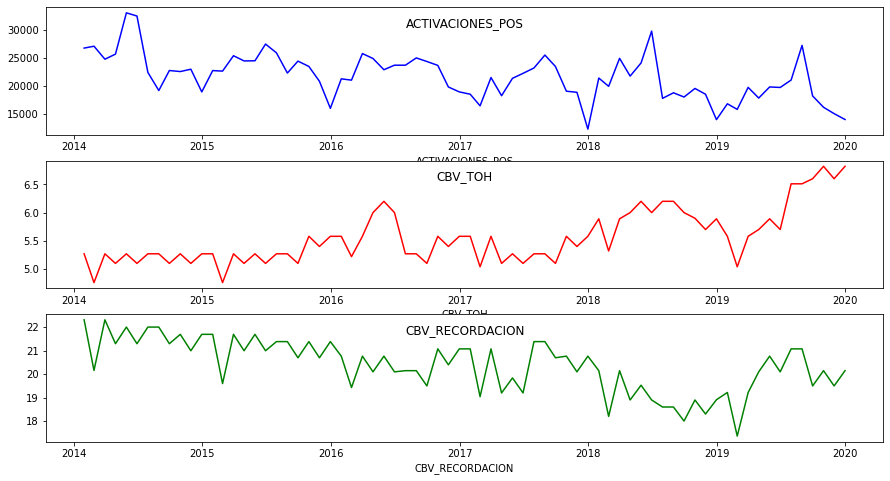

In [24]:
columnas=['ACTIVACIONES_POS','CBV_TOH','CBV_RECORDACION']
colores=['blue','red','green']

plt.figure(figsize=(15,8))
i=1
for j in range(len(columnas)):
    plt.subplot(len(columnas),1,i, xlabel=columnas[j])
    plt.plot(df_OtrasVariables[columnas[j]], color=colores[j])
    plt.title(columnas[j], y=0.8, loc='center')
    i +=1
plt.show()

### Interpretación preliminar del gráfico

* Mientras DirectTv ha bajado sus ventas la salud de marca de Cablevisión ha ido en aumento
* La recordacion de Cablevisión ha bajado pero su curva es más estable que la de DirectTv

### Revisión variables macro para entender cuales podrian explicar la tendencia a la baja del servicio.

In [26]:
df_MACRO = df[["ACTIVACIONES_POS", "MACRO_DESEMPLEO", "MACRO_IPC", "MACRO_USD"]].corr()
df_MACRO

,ACTIVACIONES_POS,MACRO_DESEMPLEO,MACRO_IPC,MACRO_USD
ACTIVACIONES_POS,1.000000,-0.099068,-0.094850,-0.168179
MACRO_DESEMPLEO,-0.099068,1.000000,0.562663,0.709763
MACRO_IPC,-0.094850,0.562663,1.000000,0.580698
MACRO_USD,-0.168179,0.709763,0.580698,1.000000


### Interpretación
* A priori el comportamiento de la variable tipo de cambio podria contribuir a la explicacion de la caida de las activaciones.

# Aplicación Modelo ML Regresión Lineal Múltiple como Baseline

* Se ajustará el extrayendo columnas ya representadas en su total, por ejemplo'IMEDIOS_AOS','MEDIOS_PRE','MEDIO_POS','MEDIOS_DTV' están representadas en COMP_DTV
* Se reindexa y se crea la columna día a efecto de asociar la estacionalidad al día
* Se pasará del df al df3 que se usará en el modelo

In [27]:
df.head()

,DATE,ACTIVACIONES_POS,CONTACTOS_TLV,CONTACTOS_WEB,CONTACTOS_IMP,BB_CATEGORIA,DTV_RECORDACION,DTV_PROGRAMACION,DTV_TOH,DTV_DEPORTE,...,CBV_DEPORTE,CBV_GOOGLETRENDS,TEL_GOOGLETRENDS,NET_GOOGLETRENDS,ANT_GOOGLETRENDS,IMEDIOS_AOS,MEDIOS_PRE,MEDIO_POS,MEDIOS_DTV,COMP_DTV
DATE,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,0,0,135.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.42,0.29,0.06,0.18,0.0,14907.49,5234.59,8034.35,17741.94,45918.37
2014-01-02,2014-01-02,1095,846,1977.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.42,0.29,0.06,0.18,0.0,14907.49,3143.85,8291.79,17741.94,44085.07
2014-01-03,2014-01-03,858,732,1486.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.42,0.29,0.06,0.18,0.0,14907.49,3076.11,6356.17,17741.94,42081.71
2014-01-04,2014-01-04,567,443,821.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.42,0.29,0.06,0.18,0.0,14907.49,3025.88,5621.20,17741.94,41296.51
2014-01-05,2014-01-05,13,156,430.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.42,0.29,0.06,0.18,0.0,14907.49,2991.54,5637.60,17741.94,41278.57


In [28]:
df.drop('DATE',axis=1, inplace=True)

In [29]:
df.reset_index(inplace=True)

In [30]:
df.head()

,DATE,ACTIVACIONES_POS,CONTACTOS_TLV,CONTACTOS_WEB,CONTACTOS_IMP,BB_CATEGORIA,DTV_RECORDACION,DTV_PROGRAMACION,DTV_TOH,DTV_DEPORTE,...,CBV_DEPORTE,CBV_GOOGLETRENDS,TEL_GOOGLETRENDS,NET_GOOGLETRENDS,ANT_GOOGLETRENDS,IMEDIOS_AOS,MEDIOS_PRE,MEDIO_POS,MEDIOS_DTV,COMP_DTV
0,2014-01-01,0,0,135.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.42,0.29,0.06,0.18,0.0,14907.49,5234.59,8034.35,17741.94,45918.37
1,2014-01-02,1095,846,1977.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.42,0.29,0.06,0.18,0.0,14907.49,3143.85,8291.79,17741.94,44085.07
2,2014-01-03,858,732,1486.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.42,0.29,0.06,0.18,0.0,14907.49,3076.11,6356.17,17741.94,42081.71
3,2014-01-04,567,443,821.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.42,0.29,0.06,0.18,0.0,14907.49,3025.88,5621.20,17741.94,41296.51
4,2014-01-05,13,156,430.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.42,0.29,0.06,0.18,0.0,14907.49,2991.54,5637.60,17741.94,41278.57


In [31]:
eliminar=['IMEDIOS_AOS','MEDIOS_PRE','MEDIO_POS','MEDIOS_DTV']
df2=df.drop(eliminar,axis=1)
df2.shape

(2191, 47)

In [32]:
df2.head()

,DATE,ACTIVACIONES_POS,CONTACTOS_TLV,CONTACTOS_WEB,CONTACTOS_IMP,BB_CATEGORIA,DTV_RECORDACION,DTV_PROGRAMACION,DTV_TOH,DTV_DEPORTE,...,COMP_CABLEVISION,CBV_RECORDACION,CBV_PROGRAMACION,CBV_TOH,CBV_DEPORTE,CBV_GOOGLETRENDS,TEL_GOOGLETRENDS,NET_GOOGLETRENDS,ANT_GOOGLETRENDS,COMP_DTV
0,2014-01-01,0,0,135.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,158804.64,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,45918.37
1,2014-01-02,1095,846,1977.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,193118.34,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,44085.07
2,2014-01-03,858,732,1486.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,206737.44,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,42081.71
3,2014-01-04,567,443,821.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,303592.80,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41296.51
4,2014-01-05,13,156,430.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,259774.24,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41278.57


In [33]:
df2['DIA']= df2.DATE.dt.day

In [34]:
df2.head()

,DATE,ACTIVACIONES_POS,CONTACTOS_TLV,CONTACTOS_WEB,CONTACTOS_IMP,BB_CATEGORIA,DTV_RECORDACION,DTV_PROGRAMACION,DTV_TOH,DTV_DEPORTE,...,CBV_RECORDACION,CBV_PROGRAMACION,CBV_TOH,CBV_DEPORTE,CBV_GOOGLETRENDS,TEL_GOOGLETRENDS,NET_GOOGLETRENDS,ANT_GOOGLETRENDS,COMP_DTV,DIA
0,2014-01-01,0,0,135.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,45918.37,1
1,2014-01-02,1095,846,1977.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,44085.07,2
2,2014-01-03,858,732,1486.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,42081.71,3
3,2014-01-04,567,443,821.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41296.51,4
4,2014-01-05,13,156,430.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41278.57,5


In [35]:
cols=list(df2.columns)

In [36]:
cols2=cols[-1:]+cols[:-1]

In [37]:
df2=df2[cols2]

In [38]:
df2.head()

,DIA,DATE,ACTIVACIONES_POS,CONTACTOS_TLV,CONTACTOS_WEB,CONTACTOS_IMP,BB_CATEGORIA,DTV_RECORDACION,DTV_PROGRAMACION,DTV_TOH,...,COMP_CABLEVISION,CBV_RECORDACION,CBV_PROGRAMACION,CBV_TOH,CBV_DEPORTE,CBV_GOOGLETRENDS,TEL_GOOGLETRENDS,NET_GOOGLETRENDS,ANT_GOOGLETRENDS,COMP_DTV
0,1,2014-01-01,0,0,135.0,0.0,9232.35,0.81,0.52,0.55,...,158804.64,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,45918.37
1,2,2014-01-02,1095,846,1977.0,0.0,9232.35,0.81,0.52,0.55,...,193118.34,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,44085.07
2,3,2014-01-03,858,732,1486.0,0.0,9232.35,0.81,0.52,0.55,...,206737.44,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,42081.71
3,4,2014-01-04,567,443,821.0,0.0,9232.35,0.81,0.52,0.55,...,303592.80,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41296.51
4,5,2014-01-05,13,156,430.0,0.0,9232.35,0.81,0.52,0.55,...,259774.24,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41278.57


In [39]:
df3=df2.drop('DATE', axis=1)

In [40]:
df3.head()

,DIA,ACTIVACIONES_POS,CONTACTOS_TLV,CONTACTOS_WEB,CONTACTOS_IMP,BB_CATEGORIA,DTV_RECORDACION,DTV_PROGRAMACION,DTV_TOH,DTV_DEPORTE,...,COMP_CABLEVISION,CBV_RECORDACION,CBV_PROGRAMACION,CBV_TOH,CBV_DEPORTE,CBV_GOOGLETRENDS,TEL_GOOGLETRENDS,NET_GOOGLETRENDS,ANT_GOOGLETRENDS,COMP_DTV
0,1,0,0,135.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,158804.64,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,45918.37
1,2,1095,846,1977.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,193118.34,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,44085.07
2,3,858,732,1486.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,206737.44,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,42081.71
3,4,567,443,821.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,303592.80,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41296.51
4,5,13,156,430.0,0.0,9232.35,0.81,0.52,0.55,0.56,...,259774.24,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41278.57


In [41]:
df3['ACTIVACIONES_POS'].describe()

count    2191.000000
mean      715.361022
std       406.243166
min         0.000000
25%       456.000000
50%       798.000000
75%      1003.500000
max      2277.000000
Name: ACTIVACIONES_POS, dtype: float64

## Separación de conjuntos x e y (target)

* Revisión de mediciones de ambos conjuntos
* Gráfica para visualizar target

In [42]:
x=df3.drop('ACTIVACIONES_POS', axis=1)
y=df3.iloc[:,1]

In [43]:
print('Conjunto x: ',x.shape, '\nConjunto y: ',y.shape)

Conjunto x:  (2191, 46) 
Conjunto y:  (2191,)


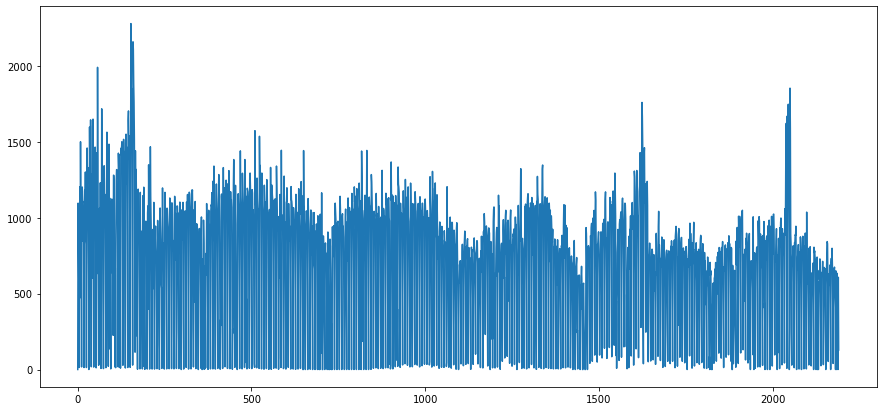

In [44]:
import matplotlib.pyplot as plt

eje_x=list(range(x.shape[0])) 
eje_y=y
fig, ax=plt.subplots()
ax.plot(eje_x,eje_y,'-')
fig.set_size_inches(15,7)
plt.show() 

## Aplicación del modelo

* Importación de librerías
* Separación de conjuntos de datos en train y test

In [45]:
#importación de librerías
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

print("x_train",x_train.shape,"\ny_train",y_train.shape)
print("x_test",x_test.shape,"\ny_test",y_test.shape)

x_train (1533, 46) 
y_train (1533,)
x_test (658, 46) 
y_test (658,)


In [47]:
LRM = LinearRegression()

In [48]:
# Entrenamiento
LRM_Trained = LRM.fit(x_train,y_train)
# Predigo con el testeo
y_pred_LRM = LRM_Trained.predict(x_test)

## Métricas del modelo

* En principio se usarán las métricas MSE, MAE y RMSE
* Posterirormente se aplicará el r2

In [49]:
def summary(y_real,y_predicho):
    print("mse",mean_squared_error(y_real,y_predicho))
    print("mae",mean_absolute_error(y_real,y_predicho))
    print("rmse",np.sqrt(mean_absolute_error(y_real,y_predicho)))

In [50]:
summary(y_test,y_pred_LRM)

mse 44196.43167561431
mae 156.04385181797346
rmse 12.491751351110599


In [51]:
def mean_absolute_percentage_error(y_test, y_pred_LRM): 
    y_test, y_pred_LRM = np.array(y_test), np.array(y_pred_LRM)
    return np.mean(np.abs((y_test - y_pred_LRM) / y_test)) * 100
print("mape", mean_absolute_percentage_error(y_test, y_pred_LRM))

mape inf


C:\Users\saave\AppData\Local\Temp\ipykernel_46684\2346700918.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_test - y_pred_LRM) / y_test)) * 100


### Métrica r2

In [52]:
r2_score(y_test, y_pred_LRM, multioutput='variance_weighted')

0.7215179578398868

# Visualización tabla valores reales(test) versus predicción del modelo

In [53]:
compa=pd.DataFrame({'real':y_test, 'predicho':y_pred_LRM}) #se crea dataframe para ver los valores y del test versus los de predicción
compa.head(20)

,real,predicho
1414,766,657.847557
395,537,581.969113
2140,639,634.994134
927,507,549.574377
2105,799,873.343664
1123,579,371.321863
554,12,350.082547
1821,620,913.488225
977,29,299.927438
1545,1039,1018.452404


In [54]:
compa['predicho'].describe()

count     658.000000
mean      729.316486
std       363.285672
min      -269.773001
25%       425.316217
50%       804.226231
75%       949.859133
max      2488.330034
Name: predicho, dtype: float64

## Interpretación preliminar

* El modelo alcanza un r2 del 72% aprox.
* A nivel de describe las estadísticas del valor real (test) versus predicción tienen similitudes, en concreto el modelo arroja que el 75% de los valores son menores o están en torno a 949 mientras la data real en torno a 1003.

# Gráfica valor real (test) vs predicción modelo

* Gráfica todo el conjunto test
* Gráfica tipo zoom con sólo 50 muestras para ver con mayor claridad

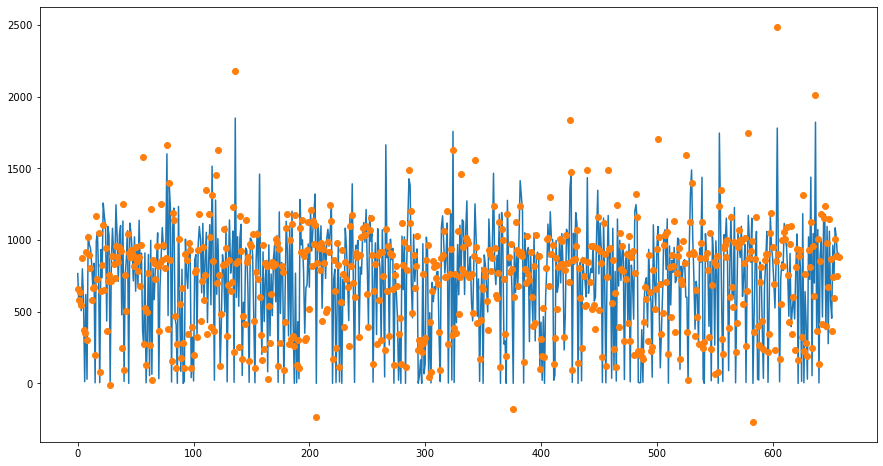

In [55]:
eje_x=list(range(x_test.shape[0]))
eje_y=y_test
eje_y2=y_pred_LRM
fig, ax=plt.subplots()
ax.plot(eje_x, eje_y, '-', eje_x, eje_y2, 'o')
fig.set_size_inches(15,8) #grafica muestra valores test'-'' y vs los prediccion 'o'

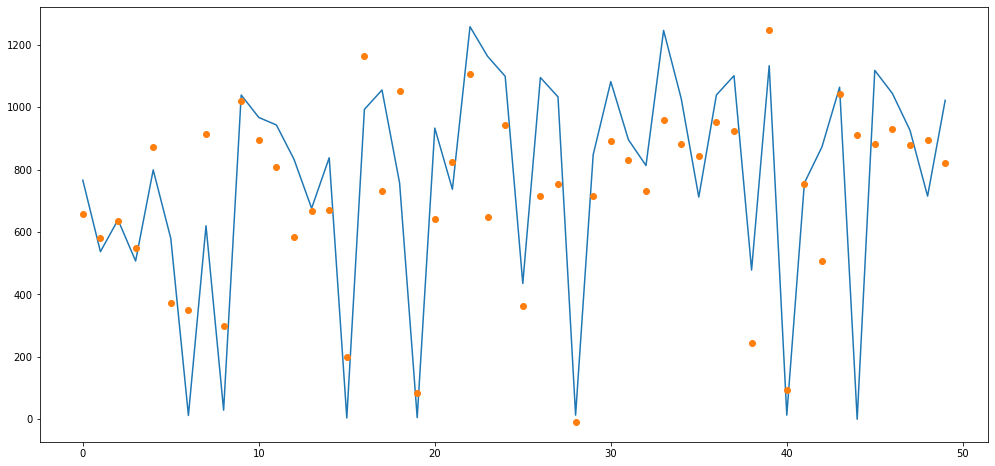

In [56]:
def plot30(y_verd, y_pred): #funcion permite ver muestra con 50 datos para tener vista zoom
    eje_x=list(range(50))
    eje_y=y_test[:50]
    eje_y2=y_pred_LRM[:50]
    fig, ax=plt.subplots()
    ax.plot(eje_x, eje_y, '-', eje_x, eje_y2, 'o')
    fig.set_size_inches(17,8)

plot30(y_test, y_pred_LRM)

# Aplicación de métodos de selección de variables y evaluación de modelos con OLS

* Se utilizarán 2 métodos SFS y forward_selection
* Luego mediante OLS se revisarán las métricas de cada selección de variables


In [57]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=22,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [58]:
sfs.fit(x, y)
sfs.k_feature_names_     #Lista final de features

('DIA',
 'CONTACTOS_TLV',
 'CONTACTOS_WEB',
 'CONTACTOS_IMP',
 'BB_CATEGORIA',
 'DTV_PROGRAMACION',
 'DTV_TOH',
 'MACRO_IPC',
 'MACRO_USD',
 'GT_DEPOR_COPA_ARGENTINA',
 'GT_DEPOR_CHAMPIONS_LEAGUE',
 'GT_DEPOR_REAL_VS_BARZA',
 'GT_DEPOR_RACING_VS_INDEP',
 'GT_DEPOR_MUNDIAL_FUTBOL',
 'GT_DEPOR_ROLAND_GARROS',
 'GT_DEPOR_WIMBLEDON',
 'PRECIO_DIRECTV',
 'DTV__CTA',
 'COMP_TELECENTRO',
 'CBV_TOH',
 'CBV_DEPORTE',
 'TEL_GOOGLETRENDS')

In [59]:
seleccion1=list(sfs.k_feature_names_)

## Aplicación Forward selection

In [60]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [61]:
forward_selection(x,y)

C:\Users\saave\AppData\Local\Temp\ipykernel_46684\846456422.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\saave\AppData\Local\Temp\ipykernel_46684\846456422.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\saave\AppData\Local\Temp\ipykernel_46684\846456422.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\saave\AppData\Local\Temp\ipykernel_46684\846456422.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future versio

['CONTACTOS_TLV',
 'CONTACTOS_WEB',
 'GT_DEPOR_COPA_ARGENTINA',
 'DTV__CTA',
 'COMP_TELECENTRO',
 'MACRO_USD',
 'DIA',
 'CBV_TOH',
 'GT_DEPOR_ROLAND_GARROS',
 'MACRO_IPC',
 'PRECIO_DIRECTV',
 'TEL_GOOGLETRENDS',
 'GT_DEPOR_WIMBLEDON',
 'GT_DEPOR_CHAMPIONS_LEAGUE',
 'GT_DEPOR_RACING_VS_INDEP',
 'DTV_TOH',
 'DTV_PROGRAMACION',
 'CBV_DEPORTE',
 'BB_CATEGORIA',
 'GT_DEPOR_MUNDIAL_FUTBOL',
 'CONTACTOS_IMP']

# Aplicación OLS para medir desempeño de métodos de selección de variables

* Primero se visualizará la relación entre las ventas(activaciones) versus la inversión total en medios
* Luego se medirán los desempeños de los 2 métodos de selección de variables utilizados

In [62]:
from sklearn.datasets import load_wine
import seaborn as sns
import statsmodels.formula.api as sm

In [63]:
model1 = 'ACTIVACIONES_POS~COMP_DTV'
lm1    = sm.ols(formula = model1, data = df3).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       ACTIVACIONES_POS   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     69.16
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.58e-16
Time:                        13:20:13   Log-Likelihood:                -16236.
No. Observations:                2191   AIC:                         3.248e+04
Df Residuals:                    2189   BIC:                         3.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    632.7342     13.106     48.278      0.0

In [64]:
model2 = 'ACTIVACIONES_POS~DIA+CONTACTOS_TLV+CONTACTOS_WEB+CONTACTOS_IMP+BB_CATEGORIA+DTV_PROGRAMACION+DTV_TOH+MACRO_IPC+MACRO_USD+GT_DEPOR_COPA_ARGENTINA+GT_DEPOR_CHAMPIONS_LEAGUE+GT_DEPOR_REAL_VS_BARZA+GT_DEPOR_RACING_VS_INDEP+GT_DEPOR_MUNDIAL_FUTBOL+GT_DEPOR_ROLAND_GARROS+GT_DEPOR_WIMBLEDON+PRECIO_DIRECTV+DTV__CTA+COMP_TELECENTRO+CBV_TOH+CBV_DEPORTE+TEL_GOOGLETRENDS'
lm2    = sm.ols(formula = model2, data = df3).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       ACTIVACIONES_POS   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     282.8
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:20:14   Log-Likelihood:                -14787.
No. Observations:                2191   AIC:                         2.962e+04
Df Residuals:                    2168   BIC:                         2.975e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [65]:
model3 = 'ACTIVACIONES_POS~CONTACTOS_TLV+CONTACTOS_WEB+GT_DEPOR_COPA_ARGENTINA+DTV__CTA+COMP_TELECENTRO+MACRO_USD+DIA+CBV_TOH+GT_DEPOR_ROLAND_GARROS+MACRO_IPC+PRECIO_DIRECTV+TEL_GOOGLETRENDS+GT_DEPOR_WIMBLEDON+GT_DEPOR_CHAMPIONS_LEAGUE+GT_DEPOR_RACING_VS_INDEP+DTV_TOH+DTV_PROGRAMACION+CBV_DEPORTE+BB_CATEGORIA+GT_DEPOR_MUNDIAL_FUTBOL+CONTACTOS_IMP'
lm3    = sm.ols(formula = model3, data = df3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:       ACTIVACIONES_POS   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     295.3
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:20:15   Log-Likelihood:                -14790.
No. Observations:                2191   AIC:                         2.962e+04
Df Residuals:                    2169   BIC:                         2.975e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# Interpretaciones

* La inversión total en medios no presenta influencia relevante en las ventas
* Los modelos 2 y 3 ambos tienen un r2 mejor que el original con todas las variabales. Original 72% versus 74.2% y 74.1%

## Análisis detallados

* Análisis para aislar la injerencia de MEDIO_POS  en las ventas
* Análisis para aislar la injerencia de MEDIO_POS + MEDIOS_PRE + IMEDIOS_AOS + MEDIOS_DTV en las ventas
* Análisis para aislar la injerencia de MEDIOS_PRE en las ventas

In [71]:
model4 = 'ACTIVACIONES_POS~MEDIO_POS'
lm4    = sm.ols(formula = model4, data = df).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:       ACTIVACIONES_POS   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     41.92
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.17e-10
Time:                        14:04:01   Log-Likelihood:                -16249.
No. Observations:                2191   AIC:                         3.250e+04
Df Residuals:                    2189   BIC:                         3.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    666.6374     11.427     58.341      0.0

El resultado puntual de esta regresion lineal da como significativa la campaña POS.

In [72]:
model5 = 'ACTIVACIONES_POS~MEDIO_POS + MEDIOS_PRE + IMEDIOS_AOS + MEDIOS_DTV'
lm5    = sm.ols(formula = model5, data = df).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:       ACTIVACIONES_POS   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     26.88
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           8.37e-22
Time:                        14:05:09   Log-Likelihood:                -16217.
No. Observations:                2191   AIC:                         3.244e+04
Df Residuals:                    2186   BIC:                         3.247e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     648.5533     15.096     42.962      

In [73]:
model6 = 'ACTIVACIONES_POS~MEDIOS_PRE'
lm6    = sm.ols(formula = model6, data = df).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:       ACTIVACIONES_POS   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.009539
Date:                Thu, 28 Jul 2022   Prob (F-statistic):              0.922
Time:                        14:05:49   Log-Likelihood:                -16270.
No. Observations:                2191   AIC:                         3.254e+04
Df Residuals:                    2189   BIC:                         3.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    715.6380      9.132     78.364      0.0

Corriendo un modelo de regresion lineal con las variables de foward selection mas la campaña de medios POS, todas las variables son significativas menos la de medios. Tomamos este analisis como orientativo ya que contradice un poco el primer modelo que daba como significativa la inversion en medios de la campaña POS.

In [74]:
df2.head()

,DIA,DATE,ACTIVACIONES_POS,CONTACTOS_TLV,CONTACTOS_WEB,CONTACTOS_IMP,BB_CATEGORIA,DTV_RECORDACION,DTV_PROGRAMACION,DTV_TOH,...,COMP_CABLEVISION,CBV_RECORDACION,CBV_PROGRAMACION,CBV_TOH,CBV_DEPORTE,CBV_GOOGLETRENDS,TEL_GOOGLETRENDS,NET_GOOGLETRENDS,ANT_GOOGLETRENDS,COMP_DTV
0,1,2014-01-01,0,0,135.0,0.0,9232.35,0.81,0.52,0.55,...,158804.64,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,45918.37
1,2,2014-01-02,1095,846,1977.0,0.0,9232.35,0.81,0.52,0.55,...,193118.34,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,44085.07
2,3,2014-01-03,858,732,1486.0,0.0,9232.35,0.81,0.52,0.55,...,206737.44,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,42081.71
3,4,2014-01-04,567,443,821.0,0.0,9232.35,0.81,0.52,0.55,...,303592.80,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41296.51
4,5,2014-01-05,13,156,430.0,0.0,9232.35,0.81,0.52,0.55,...,259774.24,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41278.57


In [75]:
df2['SEMANA']= df2.DATE.dt.week

C:\Users\saave\AppData\Local\Temp\ipykernel_46684\1596759139.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['SEMANA']= df2.DATE.dt.week


In [78]:
df2.columns

Index(['DIA', 'DATE', 'ACTIVACIONES_POS', 'CONTACTOS_TLV', 'CONTACTOS_WEB',
       'CONTACTOS_IMP', 'BB_CATEGORIA', 'DTV_RECORDACION', 'DTV_PROGRAMACION',
       'DTV_TOH', 'DTV_DEPORTE', 'GA_SESIONES', 'DTV_GOOGLETRENDS',
       'MACRO_DESEMPLEO', 'MACRO_IPC', 'MACRO_USD', 'GT_DEPOR_LIBERTADORES',
       'GT_DEPOR_SUDAMERICANA', 'GT_DEPOR_COPA_AMERICA',
       'GT_DEPOR_SUPERLIGA_ARG', 'GT_DEPOR_COPA_ARGENTINA',
       'GT_DEPOR_CHAMPIONS_LEAGUE', 'GT_DEPOR_REAL_VS_BARZA',
       'GT_DEPOR_BOCA_VS_RIVER', 'GT_DEPOR_RACING_VS_INDEP',
       'GT_DEPOR_MUNDIAL_BASQUET', 'GT_DEPOR_MUNDIAL_RUGBY',
       'GT_DEPOR_MUNDIAL_FUTBOL', 'GT_DEPOR_JJOO', 'GT_DEPOR_US_OPEN',
       'GT_DEPOR_ROLAND_GARROS', 'GT_DEPOR_AUSTRALIA_OPEN',
       'GT_DEPOR_WIMBLEDON', 'GT_DEPOR_GRAND_SLAM', 'PRECIO_DIRECTV',
       'DTV__CTA', 'COMP_NETFLIX', 'COMP_TELECENTRO', 'COMP_CABLEVISION',
       'CBV_RECORDACION', 'CBV_PROGRAMACION', 'CBV_TOH', 'CBV_DEPORTE',
       'CBV_GOOGLETRENDS', 'TEL_GOOGLETRENDS', 'NET_

In [79]:
columns2=['DIA', 'SEMANA','DATE', 'ACTIVACIONES_POS', 'CONTACTOS_TLV', 'CONTACTOS_WEB',
       'CONTACTOS_IMP', 'BB_CATEGORIA', 'DTV_RECORDACION', 'DTV_PROGRAMACION',
       'DTV_TOH', 'DTV_DEPORTE', 'GA_SESIONES', 'DTV_GOOGLETRENDS',
       'MACRO_DESEMPLEO', 'MACRO_IPC', 'MACRO_USD', 'GT_DEPOR_LIBERTADORES',
       'GT_DEPOR_SUDAMERICANA', 'GT_DEPOR_COPA_AMERICA',
       'GT_DEPOR_SUPERLIGA_ARG', 'GT_DEPOR_COPA_ARGENTINA',
       'GT_DEPOR_CHAMPIONS_LEAGUE', 'GT_DEPOR_REAL_VS_BARZA',
       'GT_DEPOR_BOCA_VS_RIVER', 'GT_DEPOR_RACING_VS_INDEP',
       'GT_DEPOR_MUNDIAL_BASQUET', 'GT_DEPOR_MUNDIAL_RUGBY',
       'GT_DEPOR_MUNDIAL_FUTBOL', 'GT_DEPOR_JJOO', 'GT_DEPOR_US_OPEN',
       'GT_DEPOR_ROLAND_GARROS', 'GT_DEPOR_AUSTRALIA_OPEN',
       'GT_DEPOR_WIMBLEDON', 'GT_DEPOR_GRAND_SLAM', 'PRECIO_DIRECTV',
       'DTV__CTA', 'COMP_NETFLIX', 'COMP_TELECENTRO', 'COMP_CABLEVISION',
       'CBV_RECORDACION', 'CBV_PROGRAMACION', 'CBV_TOH', 'CBV_DEPORTE',
       'CBV_GOOGLETRENDS', 'TEL_GOOGLETRENDS', 'NET_GOOGLETRENDS',
       'ANT_GOOGLETRENDS', 'COMP_DTV']

In [80]:
df4=df2[columns2]
df4.head()

,DIA,SEMANA,DATE,ACTIVACIONES_POS,CONTACTOS_TLV,CONTACTOS_WEB,CONTACTOS_IMP,BB_CATEGORIA,DTV_RECORDACION,DTV_PROGRAMACION,...,COMP_CABLEVISION,CBV_RECORDACION,CBV_PROGRAMACION,CBV_TOH,CBV_DEPORTE,CBV_GOOGLETRENDS,TEL_GOOGLETRENDS,NET_GOOGLETRENDS,ANT_GOOGLETRENDS,COMP_DTV
0,1,1,2014-01-01,0,0,135.0,0.0,9232.35,0.81,0.52,...,158804.64,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,45918.37
1,2,1,2014-01-02,1095,846,1977.0,0.0,9232.35,0.81,0.52,...,193118.34,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,44085.07
2,3,1,2014-01-03,858,732,1486.0,0.0,9232.35,0.81,0.52,...,206737.44,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,42081.71
3,4,1,2014-01-04,567,443,821.0,0.0,9232.35,0.81,0.52,...,303592.80,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41296.51
4,5,1,2014-01-05,13,156,430.0,0.0,9232.35,0.81,0.52,...,259774.24,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41278.57


In [95]:
x=df4.drop(['DATE','ACTIVACIONES_POS'], axis=1)
y=df4.iloc[:,3]

In [96]:
y.head()

0       0
1    1095
2     858
3     567
4      13
Name: ACTIVACIONES_POS, dtype: int64

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

print("x_train",x_train.shape,"\ny_train",y_train.shape)
print("x_test",x_test.shape,"\ny_test",y_test.shape)

x_train (1533, 47) 
y_train (1533,)
x_test (658, 47) 
y_test (658,)


In [98]:
LRM2 = LinearRegression()

In [99]:
# Entrenamiento
LRM_Trained = LRM2.fit(x_train,y_train)
# Predigo con el testeo
y_pred_LRM = LRM_Trained.predict(x_test)

In [100]:
def summary(y_real,y_predicho):
    print("mse",mean_squared_error(y_real,y_predicho))
    print("mae",mean_absolute_error(y_real,y_predicho))
    print("rmse",np.sqrt(mean_absolute_error(y_real,y_predicho)))

In [101]:
summary(y_test,y_pred_LRM)

mse 44166.835904825595
mae 155.9819591174785
rmse 12.4892737626124


In [102]:
r2_score(y_test, y_pred_LRM, multioutput='variance_weighted')

0.7217044410100449

In [103]:
model2b = 'ACTIVACIONES_POS~DIA+SEMANA+CONTACTOS_TLV+CONTACTOS_WEB+CONTACTOS_IMP+BB_CATEGORIA+DTV_PROGRAMACION+DTV_TOH+MACRO_IPC+MACRO_USD+GT_DEPOR_COPA_ARGENTINA+GT_DEPOR_CHAMPIONS_LEAGUE+GT_DEPOR_REAL_VS_BARZA+GT_DEPOR_RACING_VS_INDEP+GT_DEPOR_MUNDIAL_FUTBOL+GT_DEPOR_ROLAND_GARROS+GT_DEPOR_WIMBLEDON+PRECIO_DIRECTV+DTV__CTA+COMP_TELECENTRO+CBV_TOH+CBV_DEPORTE+TEL_GOOGLETRENDS'
lm2b    = sm.ols(formula = model2b, data = df4).fit()
print(lm2b.summary())

                            OLS Regression Results                            
Dep. Variable:       ACTIVACIONES_POS   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     271.0
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:30:24   Log-Likelihood:                -14785.
No. Observations:                2191   AIC:                         2.962e+04
Df Residuals:                    2167   BIC:                         2.976e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [114]:
#sin semana
model2c = 'ACTIVACIONES_POS~DIA+CONTACTOS_TLV+CONTACTOS_WEB+CONTACTOS_IMP+BB_CATEGORIA+DTV_PROGRAMACION+DTV_TOH+MACRO_IPC+MACRO_USD+GT_DEPOR_COPA_ARGENTINA+GT_DEPOR_CHAMPIONS_LEAGUE+GT_DEPOR_REAL_VS_BARZA+GT_DEPOR_RACING_VS_INDEP+GT_DEPOR_MUNDIAL_FUTBOL+GT_DEPOR_ROLAND_GARROS+GT_DEPOR_WIMBLEDON+PRECIO_DIRECTV+DTV__CTA+COMP_TELECENTRO+CBV_TOH+CBV_DEPORTE+TEL_GOOGLETRENDS'
lm2c    = sm.ols(formula = model2c, data = df4).fit()
print(lm2c.summary())

                            OLS Regression Results                            
Dep. Variable:       ACTIVACIONES_POS   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     282.8
Date:                Fri, 29 Jul 2022   Prob (F-statistic):               0.00
Time:                        20:39:22   Log-Likelihood:                -14787.
No. Observations:                2191   AIC:                         2.962e+04
Df Residuals:                    2168   BIC:                         2.975e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
#primero creamos un diccionario donde guardamos los modelos que queremos ejecutar
models={
    'Reg. Lineal Multiple': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=123)
}

In [106]:
df4.head()

,DIA,SEMANA,DATE,ACTIVACIONES_POS,CONTACTOS_TLV,CONTACTOS_WEB,CONTACTOS_IMP,BB_CATEGORIA,DTV_RECORDACION,DTV_PROGRAMACION,...,COMP_CABLEVISION,CBV_RECORDACION,CBV_PROGRAMACION,CBV_TOH,CBV_DEPORTE,CBV_GOOGLETRENDS,TEL_GOOGLETRENDS,NET_GOOGLETRENDS,ANT_GOOGLETRENDS,COMP_DTV
0,1,1,2014-01-01,0,0,135.0,0.0,9232.35,0.81,0.52,...,158804.64,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,45918.37
1,2,1,2014-01-02,1095,846,1977.0,0.0,9232.35,0.81,0.52,...,193118.34,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,44085.07
2,3,1,2014-01-03,858,732,1486.0,0.0,9232.35,0.81,0.52,...,206737.44,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,42081.71
3,4,1,2014-01-04,567,443,821.0,0.0,9232.35,0.81,0.52,...,303592.80,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41296.51
4,5,1,2014-01-05,13,156,430.0,0.0,9232.35,0.81,0.52,...,259774.24,0.72,0.18,0.17,0.42,0.29,0.06,0.18,0.0,41278.57


In [107]:
df4=df4.drop('DATE', axis=1)

In [108]:
x=df4.drop('ACTIVACIONES_POS', axis=1)
y=df4['ACTIVACIONES_POS']

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

print("x_train",x_train.shape,"\ny_train",y_train.shape)
print("x_test",x_test.shape,"\ny_test",y_test.shape)

x_train (1533, 47) 
y_train (1533,)
x_test (658, 47) 
y_test (658,)


In [110]:
# segundo creamos la función que ejecuta cada modelo. Es decir entrena, predice y calcula métricas

def ajuste_pred(models, x_train, x_test, y_train, y_test):
    models_scores={}
    for name, model in models.items():
        #entrenar modelos
        entrenado=model.fit(x_train, y_train)
        #realizar prediccion
        y_pred=entrenado.predict(x_test)
        #evaluar métricas
        models_scores[name]=round(model.score(x_test, y_test),3), round(mean_squared_error(y_test, y_pred),3), round(mean_absolute_error(y_test, y_pred),3)
        resultado=pd.DataFrame(models_scores, index=['Score','MSE','MAE'])
    return resultado

In [111]:
models_scores=ajuste_pred(models, x_train, x_test, y_train, y_test)

In [112]:
models_scores

,Reg. Lineal Multiple,Random Forest
Score,0.722,0.839
MSE,44166.836,25613.257
MAE,155.982,100.819
